In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [16]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

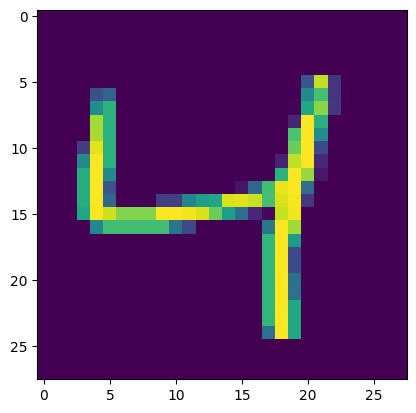

In [19]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [24]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 12s 6ms/step - loss: 0.2836 - accuracy: 0.9178 - val_loss: 0.1424 - val_accuracy: 0.9597
Epoch 2/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1196 - accuracy: 0.9648 - val_loss: 0.1091 - val_accuracy: 0.9660
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0813 - accuracy: 0.9762 - val_loss: 0.1128 - val_accuracy: 0.9659
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0625 - accuracy: 0.9807 - val_loss: 0.0897 - val_accuracy: 0.9724
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0466 - accuracy: 0.9848 - val_loss: 0.0940 - val_accuracy: 0.9737
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0400 - accuracy: 0.9868 - val_loss: 0.0988 - val_accuracy: 0.9718
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0935 - val_accuracy

In [25]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [26]:
y_pred = y_prob.argmax(axis=1)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9787

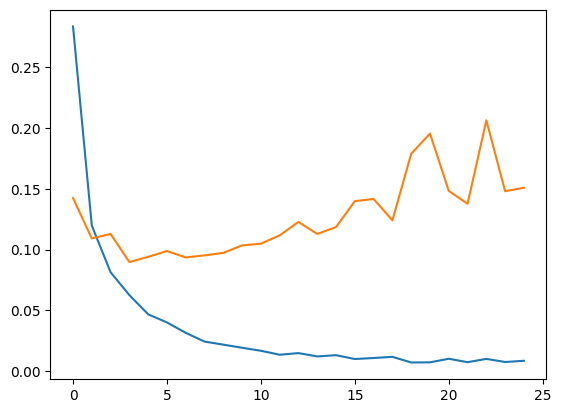

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

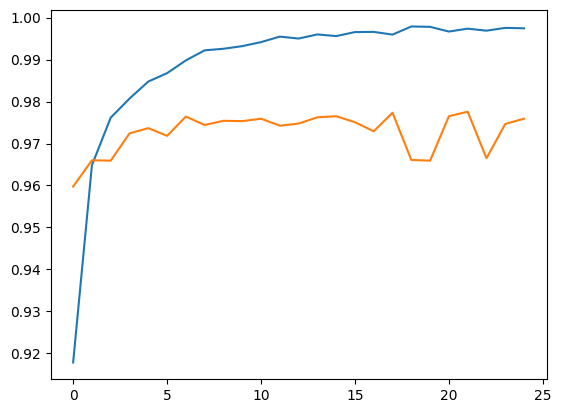

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

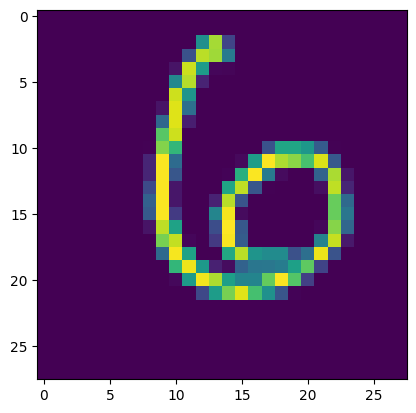

In [32]:
plt.imshow(X_test[100])

In [33]:
model.predict(X_test[100].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 35ms/step


array([6], dtype=int64)